In [14]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb

from astropy import units as u
from astropy.constants import G
from astropy.io import ascii
from matplotlib import gridspec
import scipy.optimize as sciop

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

%matplotlib inline

In [47]:
#just checking that the thing in David's .f90 code is a valid inverse transform sampling-to-get-a-Rayleigh-distribution

def rayleigh(l, z):
    """
    z = a number between 0 and 1 (inverse-transform-sampling)
    l = scale parameter of rayleigh
    """
    ray = 1.0 - np.exp(-((np.pi/(2.*np.sqrt(2.)))/l)**2)
    #print(ray)
    ray = l * np.sqrt(-2.0*np.log(1.0 - z*ray))
    return ray

In [48]:
def rayleigh_its(l, u):
    return l*np.sqrt(-2.*np.log(u))

In [49]:
def rayleighCDF(sigma,x):
    return 1. - np.exp(-x**2/(2.*sigma**2))

In [65]:
x = np.linspace(0.,1.,1000)
y01= rayleigh_its(0.1,x)
y02= rayleigh_its(0.2,x)
y03= rayleigh_its(0.3,x)
y04= rayleigh_its(0.4,x)
y05= rayleigh_its(0.5,x)
y1 = rayleigh_its(1.,x)
y2 = rayleigh_its(2.,x)
y3 = rayleigh_its(3.,x)
y4 = rayleigh_its(4.,x)

y01_test= rayleigh(0.1,x)
y02_test= rayleigh(0.2,x)
y03_test= rayleigh(0.3,x)
y04_test= rayleigh(0.4,x)
y05_test= rayleigh(0.5,x)
y1_test = rayleigh(1.,x)
y2_test = rayleigh(2.,x)
y3_test = rayleigh(3.,x)
y4_test = rayleigh(4.,x)

/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log


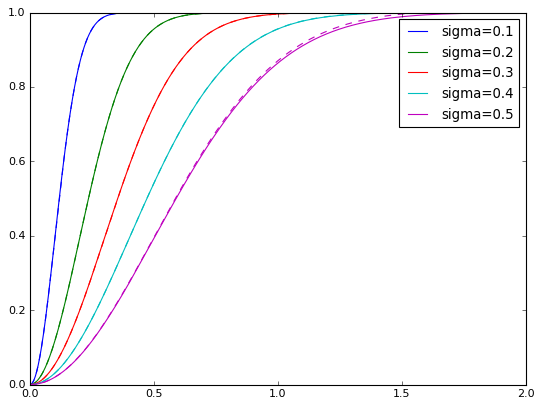

In [71]:
fig = plt.figure(figsize=(8,6))
plt.plot(y01_test,x,'b--')
plt.plot(y02_test,x,'g--')
plt.plot(y03_test,x,'r--')
plt.plot(y04_test,x,'c--')
plt.plot(y05_test,x,'m--')
#plt.plot(y1_test,x,'g--')
#plt.plot(y2_test,x,'r--')
#plt.plot(y3_test,x,'c--')
#plt.plot(y4_test,x,'m--')

plt.plot(y01,(1.0-x),'b-',label="sigma=0.1")
plt.plot(y02,(1.0-x),'g-',label="sigma=0.2")
plt.plot(y03,(1.0-x),'r-',label="sigma=0.3")
plt.plot(y04,(1.0-x),'c-',label="sigma=0.4")
plt.plot(y05,(1.0-x),'m-',label="sigma=0.5")
#plt.plot(y1,(1.0-x),'g-')
#plt.plot(y2,(1.0-x),'r-')
#plt.plot(y3,(1.0-x),'c-')
#plt.plot(y4,(1.0-x),'m-')
"""
cdf_x = np.linspace(0.,100.,5000.)
plt.plot(cdf_x,rayleighCDF(0.5,cdf_x),'b:')
plt.plot(cdf_x,rayleighCDF(1,cdf_x),'g:')
plt.plot(cdf_x,rayleighCDF(2,cdf_x),'r:')
plt.plot(cdf_x,rayleighCDF(3,cdf_x),'c:')
plt.plot(cdf_x,rayleighCDF(4,cdf_x),'m:')
"""
#plt.xlim(0.,5.)
plt.legend()
plt.savefig("./rayleighComp.png",fmt="png")

In [70]:
2.04*(np.pi/180.)

0.03560471674068432